In [1]:
# Import all the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the Dataset

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("data.csv")

Saving data.csv to data.csv


In [3]:
# Basic Cleaning of the data

df.drop(columns=["id", "Unnamed: 32"], inplace=True)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Choosing and working with the Features & Target

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [4]:
# Train-Test Split (80 - 20 split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Decision Tree Classifier

dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)
y_pred_dt = dt_default.predict(X_test)

print("Decision Tree (Default) Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report - Decision Tree (Default):\n", classification_report(y_test, y_pred_dt))

Decision Tree (Default) Accuracy: 0.9473684210526315

Classification Report - Decision Tree (Default):
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



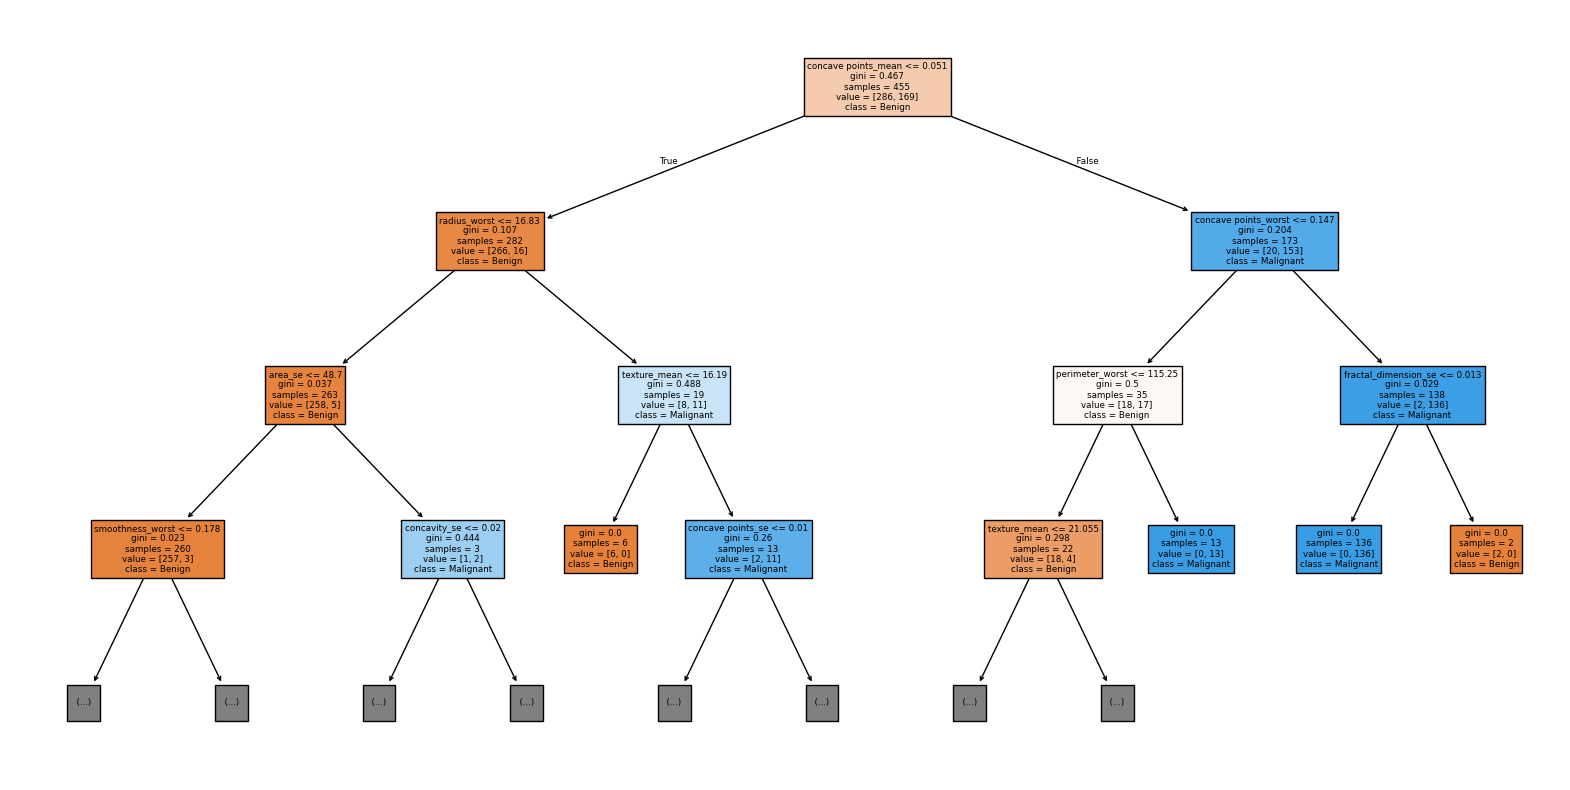

In [6]:
# Visualizing the Decision Tree

plt.figure(figsize=(20, 10))
plot_tree(dt_default, feature_names=X.columns, class_names=["Benign", "Malignant"], filled=True, max_depth=3)
plt.show()

In [7]:
# Decision Tree with Limited Depth (to avoid overfitting)

dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)
y_pred_dt_limited = dt_limited.predict(X_test)

print("Decision Tree (Max Depth=4) Accuracy:", accuracy_score(y_test, y_pred_dt_limited))

Decision Tree (Max Depth=4) Accuracy: 0.9473684210526315


In [8]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9649122807017544

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



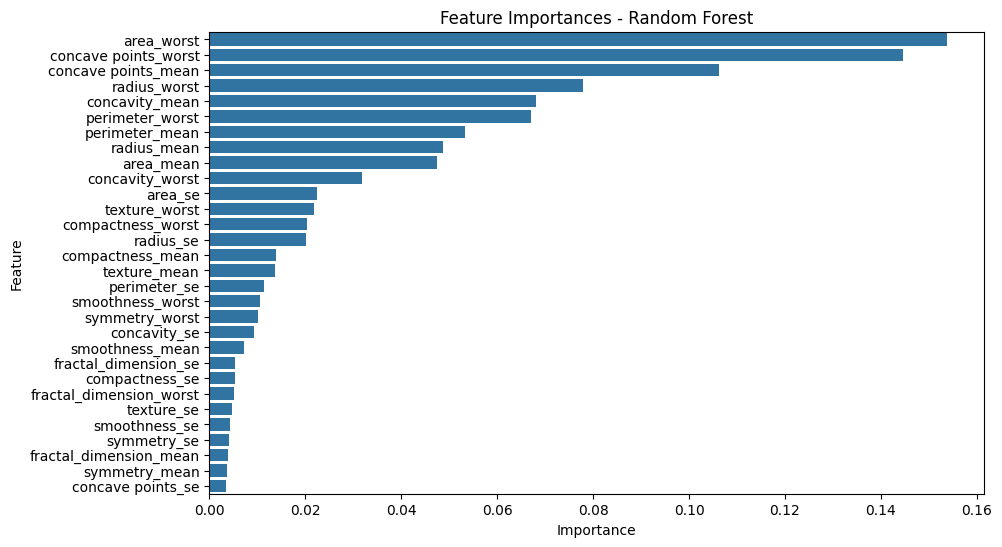

In [9]:
# Feature Importances (Random Forest)

importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
importances = importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importances)
plt.title("Feature Importances - Random Forest")
plt.show()

In [10]:
# Cross Validation for Both the Models

cv_dt = cross_val_score(dt_limited, X, y, cv=5)
cv_rf = cross_val_score(rf, X, y, cv=5)

print("Cross-Validation Accuracy (Decision Tree, max_depth=4):", cv_dt.mean())
print("Cross-Validation Accuracy (Random Forest):", cv_rf.mean())

Cross-Validation Accuracy (Decision Tree, max_depth=4): 0.9208818506443098
Cross-Validation Accuracy (Random Forest): 0.9560937742586555


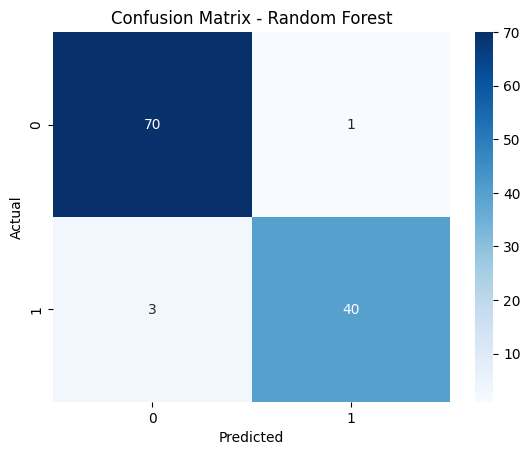

In [11]:
# Confusion Matrix - Random Forest

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()